<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Необходимо ответить на вопрос и обосновать решение следующего вопроса:

*- Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)*
    
    a) Изменится. Приведите примеры матриц.
    b) Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


Так же в рамках исследования необходимо предложить алгоритм преобразования данных для решения задачи и обосновать, почему качество линейной регрессии не поменяется.

## Загрузка данных

Загрузим необходимые для работы библиотеки.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import Pipeline

Загрузим данные.

In [3]:
path = '/datasets/insurance.csv'
try:
    df = pd.read_csv(path)
except Exception as err:
    try:
        df = pd.read_csv(path[10:])
    except Exception as err:
        print('Ошибка чтения файла:', repr(err))

Выведем первые строчки таблицы.

In [4]:
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


### Описание данных

В таблице присутствуют следующие данные:

- **Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Таблица содержит данные по 5000 клиентам страховой компании и представлена 5 колонками с данными. Пропусков в таблице нет.

Взглянем на распределения пользователей по полу.

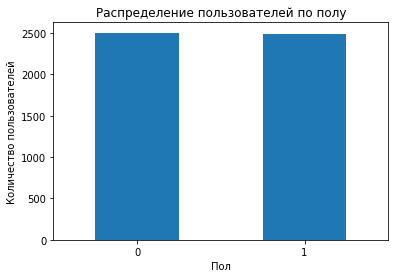

Пол
0    2505
1    2495
Name: Возраст, dtype: int64

In [6]:
df.groupby('Пол')['Возраст'].count().plot(kind='bar', rot=0)
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по полу')
plt.show()
df.groupby('Пол')['Возраст'].count()

- Мы не знаем, как именно зашифрован пол в данном исследовании, но видим, что количество мужчин и женщин примерно одинаковое.

Взглянем на распределения пользователей по возрасту. Можем превратить эти данные в целочисленный тип.

In [7]:
df['Возраст'] = df['Возраст'].astype('int')

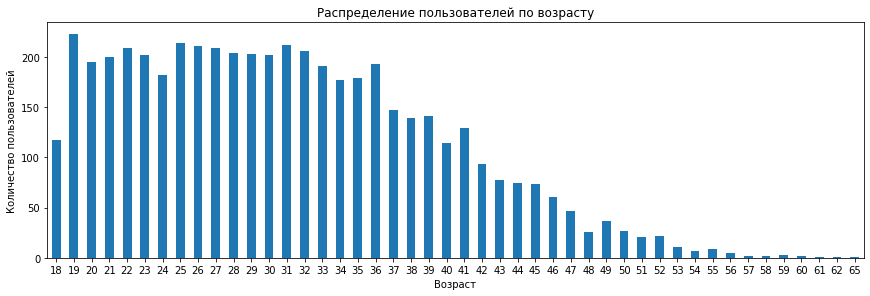

count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: Возраст, dtype: float64

In [8]:
df.groupby('Возраст')['Пол'].count().plot(kind='bar', rot=0, figsize=(12, 4))
plt.tight_layout()

plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрасту')
plt.show()

df['Возраст'].describe()

- Распределение клиентов по возрасту выглядит реалистичным - страховались клиенты от 18 до 65-летнего возраста. Средний и медианный возраст застрахованных в районе 30 лет.

Посмотрим на распределение клиентов по заработной плате.

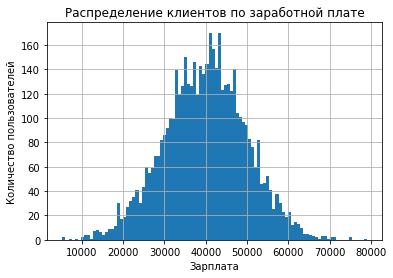

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64

In [9]:
df['Зарплата'].hist(bins=100)
plt.xlabel('Зарплата')
plt.ylabel('Количество пользователей')
plt.title('Распределение клиентов по заработной плате')
plt.show()
df['Зарплата'].describe()

- Застраховавшиеся клиенты зарабатывают от 5300 до 79000. Средний и медианный заработок в районе 40000. Распределение выглядит вполне реалистично.

Посмотрим на распределение членов семьи застраховавшихся.

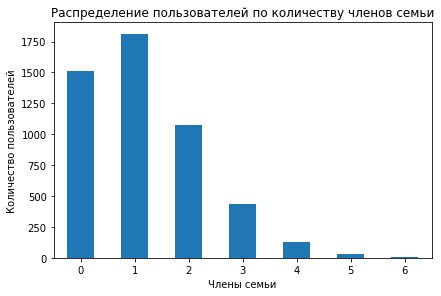

count    5000.000000
mean        1.194200
std         1.091387
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Члены семьи, dtype: float64

In [10]:
df.groupby('Члены семьи')['Пол'].count().plot(kind='bar', rot=0)
plt.tight_layout()

plt.xlabel('Члены семьи')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по количеству членов семьи')
plt.show()

df['Члены семьи'].describe()

- Застрахованные живут поодиночке или семьями до 6 человек (без учета застрахованного). В среднем и медианном значении застрахованный живет с одним человеком.

**Целевой признак**

Оценим количество страховых выплат клиенту за последние 5 лет.

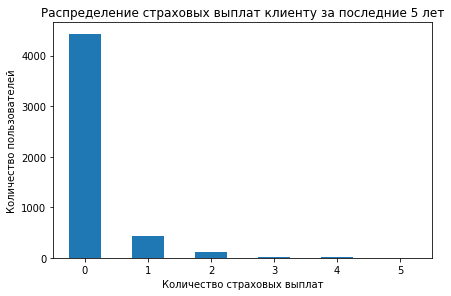

Страховые выплаты
0    4436
1     423
2     115
3      18
4       7
5       1
Name: Пол, dtype: int64

In [11]:
df.groupby('Страховые выплаты')['Пол'].count().plot(kind='bar', rot=0)
plt.tight_layout()

plt.xlabel('Количество страховых выплат')
plt.ylabel('Количество пользователей')
plt.title('Распределение страховых выплат клиенту за последние 5 лет')
plt.show()

df.groupby('Страховые выплаты')['Пол'].count()

- Клиенты за последние 5 лет получали страховые выплаты до 5 раз. Преобладающее количество клиентов ни разу не обратилось за выплатами. 

Перед обучением моделей нам придется избавиться от класса клиентов с 5 страховыми выплатами, так как там только один клиент, и модель выдает ошибку, что количество значений в каждом классе не может быть менее двух. `The minimum number of groups for any class cannot be less than 2.`


In [12]:
df = df[df['Страховые выплаты'] < 5]

## Умножение матриц

Чтобы защитить данные, записанные в матричном виде, можем умножить матрицу на другую матрицу, и в результате получим преобразованные данные. Так как мы бы хотели иметь возможность раскодировать информацию при необходимости, нужно выбрать невырожденную матрицу.

Согласно [Википедии](https://ru.wikipedia.org/wiki/Невырожденная_матрица), **невырожденная матрица** (иначе неособенная матрица) ― квадратная матрица, определитель которой отличен от нуля. В противном случае матрица называется вырожденной.

Для квадратной матрицы $M$ с элементами из некоторого поля $K$ невырожденность эквивалентна каждому из следующих условий:
- $M$ обратима, то есть существует обратная матрица;
- строки (столбцы) матрицы $M$ линейно независимы;
- ранг матрицы $M$ равен её размерности.

Так же для такой матрицы и обратной ей характерно то, что при их умножении получаем получаем единичную матрицу $E$.

Таким образом, если мы умножим матрицу признаков на шифровочную квадратную невырожденную матрицу - получим зашифрованные данные. Умножим зашифрованные данные на обратную шифровочной матрицу - получим исходные.

<!-- Далее, следуя рассуждению, что при умножении матрицы признаков на шифровочную, каждый признак клиента по итогу умножается на значения матрицы, и суммируется.
```
    [[a b]                                [[5a+7b 6a+8b]
A =  [c d]    B = [[5 6]         Aшифр =   [5c+7b 6c+8d]
     [e f]         [7 8]]                  [5e+7f 6e+8f]
      ...                                   ..... ..... 
          ]                                             ]
```
Таким образом, в зашифрованной матрице у нас будет влияние каждого признака. Думаю, такой метод нам не подходит.
Поэтому в качестве шифровочной матрицы возьмем такую, которая по основной диагонали имеет рандомные значения, отличные от нуля, а вся остальная заполнена нулями. Так мы избавимся от влияния остальных признаков в каждом конкретном значении результирующей зашифрованной матрицы. -->
Далее проверим, как линейная регрессия отреагирует на проебразование матрицы.
Для этого подставим преобразованную матрицу в модель линейной регрессии и посмотрим, повлияет ли шифрование.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки (матрица шифрования)

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ - единичная матрица - умножение матрицы на нее дает ту же матрицу

Известно, что предсказания рассчитываются по следующей формуле:
$$
a = Xw
$$

Тогда как задачей обучения является:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Подставим зашифрованную матрицу $X*P$ в формулу обучения и проверим, совпадут ли они.

$$
w_{шифр} = ((XP)^T XP)^{-1} (XP)^T y
$$
Pаскрываем скобки:
$$
w_{шифр} = (P^T X^T XP)^{-1} P^T X^T y
$$

$$
w_{шифр} = (X^T XP)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
w_{шифр} = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
Так как:
$$
(P^T)^{-1} P^T = E
$$
формула сокращается до:
$$
w_{шифр} = P^{-1} (X^T X)^{-1} E X^T y
$$

Опустим $E$:
$$
w_{шифр} = P^{-1} (X^T X)^{-1} X^T y
$$

Выходит, что:
$$
w_{шифр} = P^{-1} w
$$

Таким образом, предсказания на зашифрованных признаках будут рассчитаны по формуле:
предсказания рассчитываются по следующей формуле:
$$
a_{шифр} = XPw_{шифр}
$$
или 
$$
a_{шифр} = X P P^{-1} w
$$
Сократим часть выражения, являющееся единичной матрицей:
$$
P P^{-1} = E
$$
И получим те же самые 
$$
a_{шифр} = X w
$$

Разберемся в том, что будет, если мы выберем зашифровать значения признаков обратной к ним матрицей, в допущении, что $X$ квадратная и обратная к ней определена.

$$
w_{шифр} = ((XX^{-1})^T XX^{-1})^{-1} (XX^{-1})^T y
$$
Pаскрываем скобки:
$$
w_{шифр} = ((E)^T E)^{-1} (E)^T y
$$
Выходит:
$$
w_{шифр} = y
$$

Таким образом, предсказания на зашифрованных признаках будут рассчитаны по формуле:
предсказания рассчитываются по следующей формуле:
$$
a_{шифр} = XX^{-1}w_{шифр}
$$
или 
$$
a_{шифр} = XX^{-1}y
$$
Сократим часть выражения, являющееся единичной матрицей,  получим те же самые 
$$
a_{шифр} = y
$$

Выбирая в качестве шифровальной матрицы, в качестве предсказаний мы получим вектор целевого признака. Что нам не подходит. 

**Итак,**
матрица должна быть невырождена и не являться обратной к признакам (в случае квадратной матрицы признаков).

**Ответ:** Мы можем зашифровать признаки, используя невырожденную матрицу, и ожидаем, что это не повлияет на качество предсказаний линейной регрессии.

## Алгоритм преобразования

Если есть необходимость шифровать данные, возможно, эти данные будут переданы для обработки третьим лицам. Можно создать матрицу шифрования и хранить ее в надежном месте, или просто сгенеровать.

Для преобразования нам необходимо взять исходные признаки и умножить на матрицу шифрования размерами

$[количество\ столбцов]$x$[количество\ столбцов]$.


Необратимые матрицы встречаются редко. Если сгенерировать случайную матрицу функцией `numpy.random.normal()`, вероятность получить необратимую матрицу близка к нулю.

Чтобы найти обратную матрицу, используется функция `numpy.linalg.inv()`. Также она поможет проверить матрицу на обратимость: если матрица необратима, будет обнаружена ошибка.

Чтобы проверить потом, прошло ли шифрование проверку, обучим модели на исходных и зашифрованных данных. 

А пока разделим данные на признаки и целевой признак.

In [13]:
X = df.drop('Страховые выплаты', axis=1)
y = df['Страховые выплаты']

Сгенерируем матрицу шифрования.

In [14]:
np.random.seed(1000)
n = len(X.columns)
P = np.random.normal(size=(n, n))

Выведем полученную матрицу.

In [15]:
P

array([[-0.8044583 ,  0.32093155, -0.02548288,  0.64432383],
       [-0.30079667,  0.38947455, -0.1074373 , -0.47998308],
       [ 0.5950355 , -0.46466753,  0.66728131, -0.80611561],
       [-1.19606983, -0.40596016, -0.18237734,  0.10319289]])

Проверим её на обратимость, рассчитаем обратную к ней матрицу.

In [16]:
np.linalg.inv(P)

array([[-0.49352105, -0.39755395, -0.22374042, -0.51546613],
       [ 0.82674169,  0.98968351, -0.03366125, -0.82169313],
       [ 1.73161005, -0.15905899,  1.42559416, -0.41543104],
       [ 0.59253096, -0.99560111, -0.20619855, -0.25072817]])

Функция не выдала ошибки и рассчитала обратную матрицу для матрицы шифрования - можем зашифровать признаки.

In [17]:
X_encoded = X @ P

Посмотрим на первые строки получившейся таблицы.

In [18]:
X_encoded.head()

,0,1,2,3
0,29499.427711,-23031.625871,33092.540037,-40002.266067
1,22596.316362,-17639.856126,25351.565172,-30654.369225
2,12487.022440,-9746.723288,14009.791765,-16942.347328
3,24804.271567,-19369.268797,27823.009563,-33624.894214
4,15521.199839,-12116.596215,17413.008385,-21052.412635


**Вывод**

Теперь невозможно угадать, какие данные хранятся в колонках.

## Проверка алгоритма

Пришло время обучить модели линейной регрессии и оценить качество моделей для исходного и зашифрованного набора данных.

Так как в данном исследовании нам не нужно выбирать лучшую модель, а только проверить правильность наших предположений, то будет достаточно обучающей и тестовой выборки для каждого набора данных.

Разделим исходный и зашифрованный наборы данных на обучающую и тестовую выборки. 

In [20]:
state = 12345
X_train, X_test, X_encoded_train, X_encoded_test, y_train, y_test = train_test_split(X, X_encoded, y,
                                                                                     random_state=state,
                                                                                     test_size=0.25,
                                                                                     shuffle=True,
                                                                                     stratify=y
                                                                                    )

Проверим, что выборки разбились равномерно по целевому признаку.

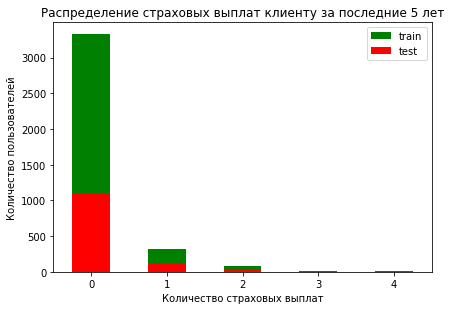

In [21]:
y_train.value_counts().plot(kind='bar', rot=0, color='g', label='train')
y_test.value_counts().plot(kind='bar', rot=0, color='r', label='test')

plt.tight_layout()

plt.xlabel('Количество страховых выплат')
plt.ylabel('Количество пользователей')
plt.title('Распределение страховых выплат клиенту за последние 5 лет')
plt.legend()
plt.show()


Масштабируем данные, хранящиеся в выборках, используя стандартизацию. Создадим объект структуры `StandardScaler()`.

In [22]:
scaler = StandardScaler()

Приступим к обучению моделей.

**Модель линейной регрессии для исходных данных**

In [23]:
pipe_lr = Pipeline([
    ('scaler', scaler),
    ('model', LinearRegression())
])


Обучаем модель.

In [24]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

Смотрим значения метрики R2.

In [25]:
r2_initial = pipe_lr.score(X_test, y_test)
r2_initial

0.419480480705946

**Модель линейной регрессии для зашифрованных данных**

In [26]:
pipe_lr.fit(X_encoded_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

Смотрим значения метрики R2.

In [27]:
r2_encoded = pipe_lr.score(X_encoded_test, y_test)
r2_encoded

0.419480480705952

Проверим, равны ли метрики наших моделей.

In [28]:
r2_encoded == r2_initial

False

Не равны, но разница очень незначительна - меньше 1/10.000, что позволяет нам быть уверенным в том, что для модели линейной регрессии нет разницы, передали мы ей исходные данные или зашифрованные.

In [29]:
np.isclose(r2_encoded, r2_initial)

True

Разница связана с особенностью хранения типа данных `float`.

**Вывод**

Целью исследования являлось защитить данные клиентов страховой компании. Был разработан и обоснован такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Для шифрования данных использовали умножение признаков на обратимую матрицу. В исследовании приведено математическое доказательство отсутствия влияния матрицы шифрования на модель линейной регрессии.

Так же в рамках исследования была проверена метрика качества R2 для моделей линейной регрессии, обученных на исходных данных и на зашифрованных. Разница в метриках качества оказалась незначительной (меньше 1/10.000) , что позволяет нам использовать такой метод шифрования данных для модели линейной регрессии.